Questions 1
How many training examples are available in the dataset?

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://swmukher.web.cern.ch/swmukher/dataset_star.csv')

# Question 1: Number of training examples
num_examples = data.shape[0]
print(f'Number of training examples: {num_examples}')

# Print the shape of the data
print(f'Shape of the data (rows, columns): {data.shape}')


Number of training examples: 240
Shape of the data (rows, columns): (240, 7)


Question 2
 Draw a 1D histogram of temperature for all stars.

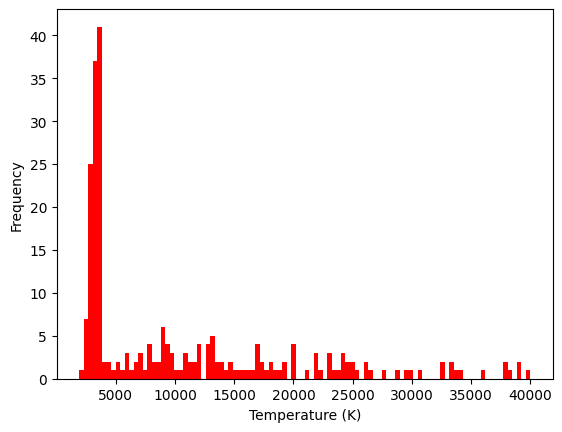

In [2]:
import matplotlib.pyplot as plt

# Question 2: 1D Histogram of Temperature for all stars
plt.hist(data['Temperature'], bins=100, color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.show()


Question 3  Draw 1D histograms of temperature for type 0 stars (in one color) and type 5 stars (in another color) on the same canvas. Note that these 2 histograms should be overlayed (i.e plotted on the same canvas) in a way that data in all bins are visible for both star-types.

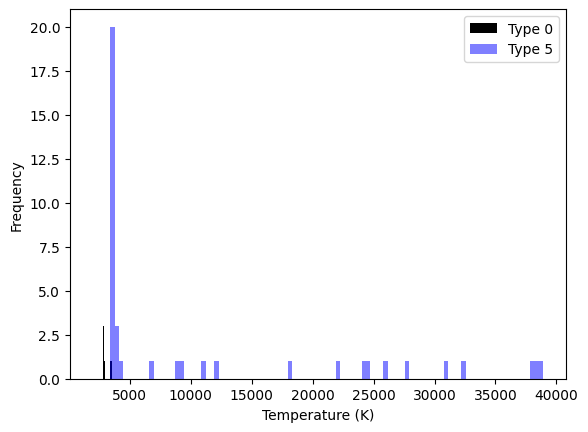

In [3]:
# Question 3: Overlayed histograms of temperature for type 0 and type 5 stars
type_0 = data[data['Type'] == 0]
type_5 = data[data['Type'] == 5]

plt.hist(type_0['Temperature'], bins=100, color='black', alpha=1, label='Type 0')
plt.hist(type_5['Temperature'], bins=100, color='blue', alpha=0.5, label='Type 5')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Questiion 4) Draw a 2D scatter plot of temperature (along X-axis) vs R (along Y-axis) for all stars.

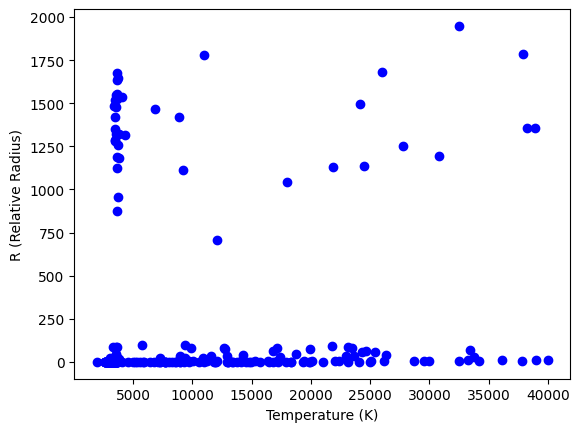

In [4]:
# Question 4: 2D Scatter plot of Temperature vs R for all stars
plt.scatter(data['Temperature'], data['R'], color='blue', alpha=1)
plt.xlabel('Temperature (K)')
plt.ylabel('R (Relative Radius)')
plt.show()


Question 5) Draw 2D scatter plots of temperature (along X-axis) vs R (along Y-axis) for each type of stars on the same canvas. Note that these 6 scatter plots (one for each star-type) should be overlayed (i.e plotted on the same canvas. Scatter plot of each star-type should be plotted with different colors, and a color label should be present in the plot to know which color corresponds to which star-type.

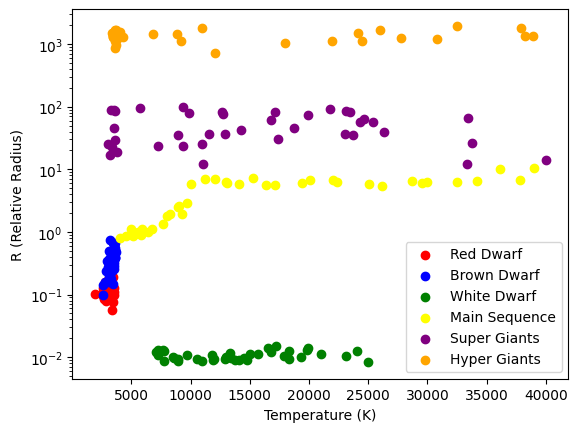

In [5]:
# Question 5: Overlayed 2D scatter plots for each star type
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
labels = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']

for i in range(6):
    star_type = data[data['Type'] == i]
    plt.scatter(star_type['Temperature'], star_type['R'], color=colors[i], label=labels[i], alpha=1)

plt.xlabel('Temperature (K)')
plt.ylabel('R (Relative Radius)')
plt.yscale('log')  # Use log scale for better readability
plt.legend()
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

# Question 6: Transform non-numerical features
le_color = LabelEncoder()
le_spectral = LabelEncoder()
# print(data['Color'])
# print(data['Spectral_Class'])
data['Color'] = le_color.fit_transform(data['Color'])
data['Spectral_Class'] = le_spectral.fit_transform(data['Spectral_Class'])
# print(data['Color'])
# print(data['Spectral_Class'])



ModuleNotFoundError: No module named 'sklearn'

In [240]:
from sklearn.model_selection import train_test_split

# Question 7: Split the data
X = data.drop('Type', axis=1)
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import  Recall
# Define the neural network
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer
model.add(Dense(64, activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (for multi-class classification)
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall'])


In [242]:
# Question 9: Number of parameters
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,726 (10.65 KB)

 Trainable params: 2,726 (10.65 KB)

 Non-trainable params: 0 (0.00 B)

In [243]:
from tensorflow.keras.utils import to_categorical

# Ensure y_train and y_test are one-hot encoded
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

# Check the shapes of X_train and y_train_cat to confirm
print("X_train shape:", X_train.shape)
print("y_train_cat shape:", y_train_cat.shape)

# Train the model
history = model.fit(X_train, y_train_cat, epochs=500, batch_size=64, validation_split=0.2)


X_train shape: (192, 6)
y_train_cat shape: (192, 6)
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - Recall: 0.1585 - accuracy: 0.1585 - loss: 29468.5781 - val_Recall: 0.2051 - val_accuracy: 0.2051 - val_loss: 25725.9434
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - Recall: 0.1572 - accuracy: 0.1572 - loss: 23606.7129 - val_Recall: 0.1795 - val_accuracy: 0.1795 - val_loss: 19378.6094
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - Recall: 0.1298 - accuracy: 0.1298 - loss: 15904.1064 - val_Recall: 0.1795 - val_accuracy: 0.1795 - val_loss: 13044.7744
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - Recall: 0.0776 - accuracy: 0.0776 - loss: 11038.6602 - val_Recall: 0.0513 - val_accuracy: 0.0513 - val_loss: 6795.1523
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - Recall: 0.0359 - accuracy: 0.0359 - loss: 5011.4448 - val_Recall: 0.1795 - val_accuracy: 0.1795 - val_loss: 4337.6064
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - Recall: 0.1559 - accuracy: 0.1559 - lo

In [244]:
# Question 11: Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


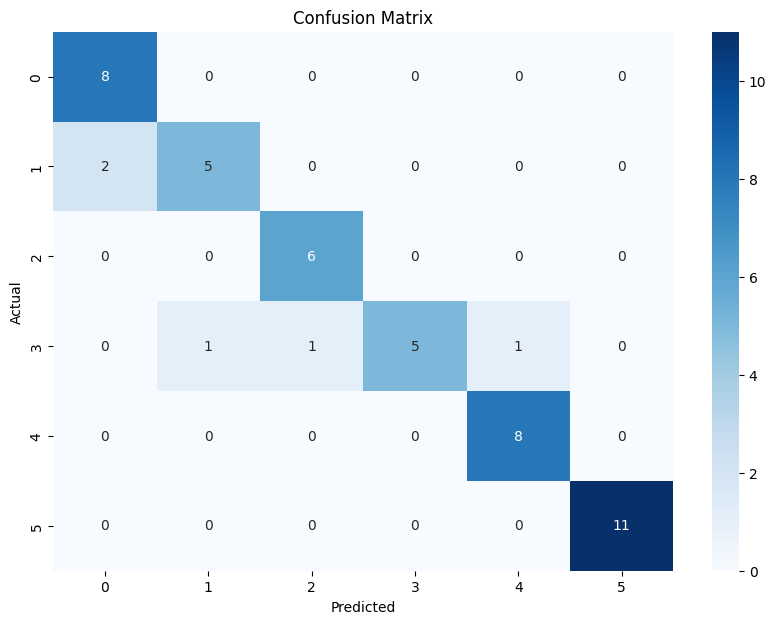

In [245]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Question 12: Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [246]:
# Question 13: Overall accuracy
_,accuracy,_= model.evaluate(X_test, y_test_cat)
print(f'Overall accuracy: {accuracy * 100:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Recall: 0.8993 - accuracy: 0.8993 - loss: 33.4011
Overall accuracy: 89.58%


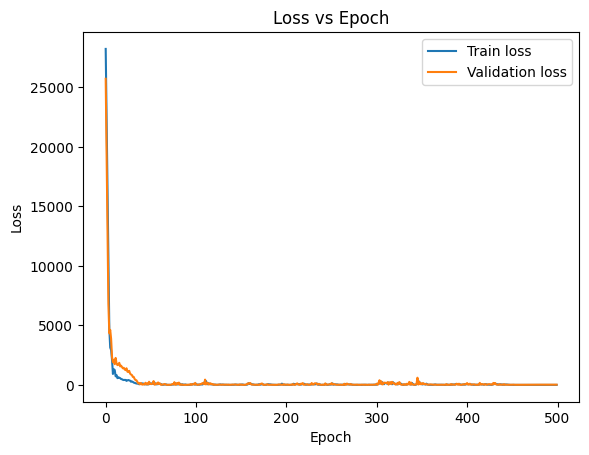

In [247]:
# Question 14: Loss vs epoch
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


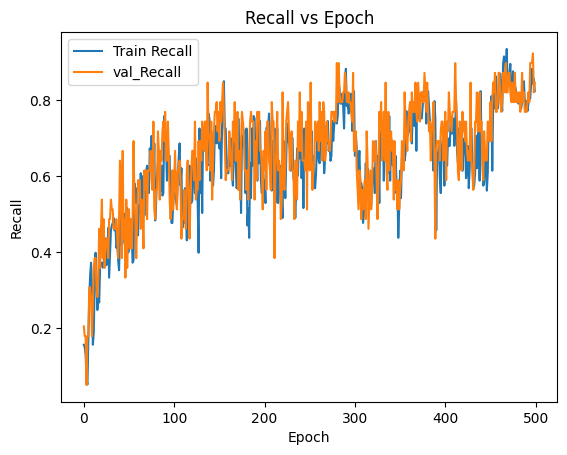

In [248]:
#Question 15: Recall vs epoch
plt.plot(history.history['Recall'], label='Train Recall')
plt.plot(history.history['val_Recall'], label='val_Recall')
plt.title('Recall vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()
